In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

import sys
if '../' not in sys.path:
    sys.path.append('../')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import networkx as nx
import numpy as np
import argparse
import joblib
import os

from analysis import Evaluation
from dynamics import SIRDynamicalSystem
import helpers

In [3]:
# Construct the adjacency  matrix A of the propagation network
net = nx.Graph()
net.add_edges_from([
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9)
])
A = nx.adjacency_matrix(net).toarray().astype(float)
n_nodes = net.number_of_nodes()
n_edges = net.number_of_edges()
print(f"Network: {n_nodes:d} nodes, {n_edges:d} edges")
print()

# Initial infections
print('Choose set of initial infected seeds')
# infected = 10
# X_init = np.hstack(((np.ones(infected), np.zeros(n_nodes - infected))))
# X_init = np.random.permutation(X_init)
X_init = np.zeros(n_nodes)
X_init[0] = 1
print()

Network: 10 nodes, 9 edges

Choose set of initial infected seeds



In [7]:
sim_dict = {
    'total_time': 100.00,
    'trials_per_setting': 5
}
param_dict = {
    'beta':  5.0,
    'gamma': 0.0,
    'delta': 0.1,
    'rho':   1.0,
    'eta':   1.0
}
cost_dict = {
    'Qlam': 1.0,
    'Qx': 400.0
}
policy_list = [
    'SOC',
]
baselines_dict = {
    'TR': 0.003,
    'MN': 0.0007,
    'LN': 0.0008,
    'LRSR': 22.807,
    'MCM': 22.807,
    'FL_info': {'N': None, 'max_u': None},
}

In [8]:
system = SIRDynamicalSystem(X_init, A, param_dict, cost_dict, debug=True, verbose=False)
data = system.simulate_policy('NO', baselines_dict, sim_dict, plot=False)


------
t=0.0000
lamY=5.00, lamW=0.10, lamN=0.00, lamSUM=5.10
Susceptible nodes: [1 2 3 4 5 6 7 8 9]
Infected nodes: [0]
Recovered nodes: []
Treated nodes: []
t+w=0.4236
Process INFECTION event at node 1

------
t=0.4236
lamY=5.00, lamW=0.20, lamN=0.00, lamSUM=5.20
Susceptible nodes: [2 3 4 5 6 7 8 9]
Infected nodes: [0 1]
Recovered nodes: []
Treated nodes: []
t+w=0.7896
Process INFECTION event at node 2

------
t=0.7896
lamY=5.00, lamW=0.30, lamN=0.00, lamSUM=5.30
Susceptible nodes: [3 4 5 6 7 8 9]
Infected nodes: [0 1 2]
Recovered nodes: []
Treated nodes: []
t+w=0.9039
Process INFECTION event at node 3

------
t=0.9039
lamY=5.00, lamW=0.40, lamN=0.00, lamSUM=5.40
Susceptible nodes: [4 5 6 7 8 9]
Infected nodes: [0 1 2 3]
Recovered nodes: []
Treated nodes: []
t+w=0.9982
Process INFECTION event at node 4

------
t=0.9982
lamY=5.00, lamW=0.50, lamN=0.00, lamSUM=5.50
Susceptible nodes: [5 6 7 8 9]
Infected nodes: [0 1 2 3 4]
Recovered nodes: []
Treated nodes: []
t+w=1.1348
Process INFECT

In [6]:
X = np.array([system.X[i].value_at(system.ttotal) for i in range(system.n_nodes)])
Y = np.array([system.Y[i].value_at(system.ttotal) for i in range(system.n_nodes)])
W = np.array([system.W[i].value_at(system.ttotal) for i in range(system.n_nodes)])
H = np.array([system.H[i].value_at(system.ttotal) for i in range(system.n_nodes)])

In [189]:
X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [190]:
Y

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [191]:
W

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [192]:
H

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [193]:
hf = helpers.HelperFunc()

tspace = np.arange(0.0, 25.0, 0.01)

# Extract the values of the stochastic processes at all times
y_values = np.zeros(len(tspace))
w_values = np.zeros(len(tspace))
for k, t in enumerate(tspace):
    y_values[k] = hf.sps_values(system.Y, t, summed=True)
    w_values[k] = hf.sps_values(system.W, t, summed=True)

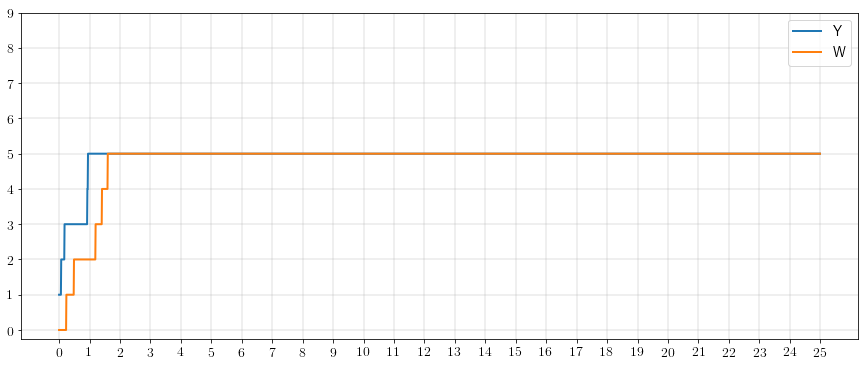

In [194]:
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(tspace, y_values, label='Y')
plt.plot(tspace, w_values, label='W')
plt.xticks(np.arange(0,tspace[-1]+1.0,1.0))
plt.yticks(range(10))
plt.legend();

In [195]:
np.array([system.W[i].value_at(20) for i in range(system.n_nodes)])

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [205]:
i = 4
system.X[i].arrival_times, system.Y[i].arrival_times, system.W[i].arrival_times

([0.9461812139283564, 1.1968156598063129],
 [0.9461812139283564],
 [1.1968156598063129])